In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("sample_dataset.csv")

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,NaN,2019.0,0.16220,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,NaN,NaN,0.0869,0.07017,NaN,0.05667,...,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.1860,0.2750,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,NaN,NaN,NaN,0.05999,...,25.53,NaN,1709.0,0.14440,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,NaN,0.2597,0.09744,...,26.50,NaN,567.7,0.20980,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,NaN,NaN,NaN,0.13280,0.1980,NaN,0.1809,NaN,...,16.67,152.20,1575.0,0.13740,NaN,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,NaN,0.2439,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,0.1752,NaN,...,38.25,155.00,1731.0,0.11660,0.1922,0.3215,0.1628,0.2572,NaN,0
566,16.60,28.08,108.30,NaN,0.08455,0.10230,NaN,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,NaN,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,NaN,...,NaN,184.60,1821.0,0.16500,0.8681,0.9387,0.2650,0.4087,0.12400,0


In [4]:
df["area error"].value_counts()

A    489
B      4
C      1
Name: area error, dtype: int64

In [5]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                  object
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [6]:
categorical = df.select_dtypes(include = ["object", "category", "bool"]).columns

In [7]:
numerical = df.select_dtypes(exclude = ["object", "category", "bool"]).columns

In [8]:
categorical

Index(['area error'], dtype='object')

In [9]:
numerical

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='object')

In [10]:
df = df.iloc[:, 0:3]

In [11]:
df

,mean radius,mean texture,mean perimeter
0,NaN,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,NaN
...,...,...,...
564,21.56,22.39,142.00
565,NaN,28.25,131.20
566,16.60,28.08,108.30
567,20.60,29.33,140.10


In [12]:
cleaner = SimpleImputer(strategy = "mean")

In [13]:
cleaner.fit_transform(df)

array([[ 14.05954772,  10.38      , 122.8       ],
       [ 20.57      ,  17.77      , 132.9       ],
       [ 19.69      ,  21.25      , 130.        ],
       ...,
       [ 16.6       ,  28.08      , 108.3       ],
       [ 20.6       ,  29.33      , 140.1       ],
       [  7.76      ,  19.31182927,  47.92      ]])

In [14]:
df = cleaner.transform(df)

In [15]:
df = pd.DataFrame(df)

In [16]:
df

,0,1,2
0,14.059548,10.380000,122.800000
1,20.570000,17.770000,132.900000
2,19.690000,21.250000,130.000000
3,11.420000,20.380000,77.580000
4,20.290000,14.340000,92.039025
...,...,...,...
564,21.560000,22.390000,142.000000
565,14.059548,28.250000,131.200000
566,16.600000,28.080000,108.300000
567,20.600000,29.330000,140.100000


In [17]:
df = pd.read_csv("sample_dataset.csv")

In [18]:
df["area error"].isnull().sum()

75

In [19]:
df["area error"].value_counts()

A    489
B      4
C      1
Name: area error, dtype: int64

In [20]:
df = df[["area error"]]

In [21]:
df

,area error
0,A
1,A
2,A
3,A
4,NaN
...,...
564,A
565,A
566,A
567,A


In [22]:
cleaner = SimpleImputer(strategy = "most_frequent")

In [23]:
cleaner.fit_transform(df)

array([['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
      

In [24]:
cleaner = SimpleImputer(strategy = "constant", fill_value = "Undefined")

In [25]:
cleaner.fit_transform(df)

array([['A'],
       ['A'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['Undefined'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['Undefined'],
       ['A'],
       ['A'],
       ['A'],
       ['A'],
      

In [26]:
df = pd.read_csv("sample_dataset.csv")

In [27]:
from sklearn.impute import KNNImputer

In [28]:
df = df.iloc[:, 0:3]

In [29]:
cleaner = KNNImputer(n_neighbors = 5)

In [30]:
cleaner.fit_transform(df)

array([[ 13.9636,  10.38  , 122.8   ],
       [ 20.57  ,  17.77  , 132.9   ],
       [ 19.69  ,  21.25  , 130.    ],
       ...,
       [ 16.6   ,  28.08  , 108.3   ],
       [ 20.6   ,  29.33  , 140.1   ],
       [  7.76  ,  20.014 ,  47.92  ]])

In [31]:
cleaner = KNNImputer(n_neighbors = 10, weights = "distance")

In [32]:
cleaner.fit_transform(df)

array([[ 15.51148032,  10.38      , 122.8       ],
       [ 20.57      ,  17.77      , 132.9       ],
       [ 19.69      ,  21.25      , 130.        ],
       ...,
       [ 16.6       ,  28.08      , 108.3       ],
       [ 20.6       ,  29.33      , 140.1       ],
       [  7.76      ,  24.25892267,  47.92      ]])

In [33]:
df = pd.read_csv("sample_dataset.csv")

In [34]:
from sklearn.compose import ColumnTransformer, make_column_selector

In [35]:
numerical = df.select_dtypes(exclude = "object").columns

In [36]:
categorical = df.select_dtypes(include = "object").columns

In [37]:
cleaner = ColumnTransformer([
    ("numerical transformer", SimpleImputer(strategy = "mean"), numerical),
    ("categorical transformer", SimpleImputer(strategy = "most_frequent"), categorical)
])

In [38]:
cleaner.fit_transform(df)

array([[14.059547717842323, 10.38, 122.8, ..., 0.1189, 0.0, 'A'],
       [20.57, 17.77, 132.9, ..., 0.08436317021276594, 0.0, 'A'],
       [19.69, 21.25, 130.0, ..., 0.08758, 0.0, 'A'],
       ...,
       [16.6, 28.08, 108.3, ..., 0.0782, 0.0, 'A'],
       [20.6, 29.33, 140.1, ..., 0.124, 0.0, 'A'],
       [7.76, 19.311829268292684, 47.92, ..., 0.07039, 1.0, 'A']],
      dtype=object)

In [39]:
df = pd.read_csv("sample_dataset.csv")

In [40]:
cleaner = ColumnTransformer(
    [("categorical", SimpleImputer(strategy="constant", fill_value="N"), make_column_selector(dtype_exclude="object")),
     ("numerical", SimpleImputer(strategy="mean"), make_column_selector(dtype_exclude="object"))]
)

In [41]:
df = pd.read_csv("sample_dataset.csv")

In [42]:
cleaner = KNNImputer(n_neighbors = 10, weights = "distance based")

In [43]:
transformations = [
    ("numerical", SimpleImputer(strategy="constant", fill_value = 0), make_column_selector(dtype_include="number"))
]

cleaner2 = ColumnTransformer(transformations)

In [44]:
cleaner2.fit_transform(df)

array([[0.000e+00, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 0.000e+00,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 0.000e+00, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
enc = OneHotEncoder()

In [47]:
X = np.array([["A"], ["A"], ["B"], ["C"]])

In [48]:
enc.fit_transform(X).todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [49]:
import python_test
pt = python_test

In [50]:
X = [["X", "High"], ["Y", "Low"], ["Z", "Medium"], ["X", "Low"]]

In [51]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [52]:
enc = ColumnTransformer([
    ("onehotencoder", OneHotEncoder(), [0,1])
])

enc.fit_transform(X)

array([[1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.]])

In [53]:
encoder = ColumnTransformer([
    ("first", OneHotEncoder(), [0]),
    ("second", OrdinalEncoder(categories = [["Low", "Medium", "High"]]), [1])
])

In [54]:
encoder.fit_transform(X)

array([[1., 0., 0., 2.],
       [0., 1., 0., 0.],
       [0., 0., 1., 1.],
       [1., 0., 0., 0.]])

In [55]:
X

[['X', 'High'], ['Y', 'Low'], ['Z', 'Medium'], ['X', 'Low']]

In [56]:
enc = ColumnTransformer([
    ("first", OneHotEncoder(categories = [["X", "Y", "Z", "W"]]), [0]),
    ("second", OrdinalEncoder(categories = [["Low", "Medium", "High", "Very high"]]), [1])
])

In [57]:
enc.fit_transform(X)

array([[1., 0., 0., 0., 2.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0.]])

In [58]:
from sklearn.preprocessing import PowerTransformer

In [59]:
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("sample_dataset.csv")

In [61]:
df = df.iloc[:,0:5].dropna()

In [62]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


<AxesSubplot:>

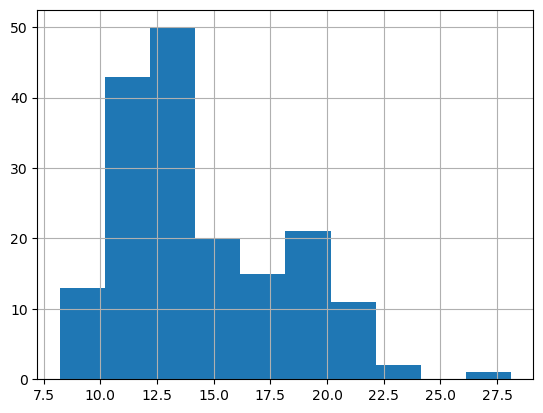

In [63]:
df["mean radius"].hist()

In [64]:
power = PowerTransformer()

In [65]:
t = power.fit_transform(df)

(array([ 4.,  7., 13., 34., 39., 22., 20., 27.,  9.,  1.]),
 array([-2.54500995, -2.03906966, -1.53312936, -1.02718906, -0.52124877,
        -0.01530847,  0.49063182,  0.99657212,  1.50251242,  2.00845271,
         2.51439301]),
 <BarContainer object of 10 artists>)

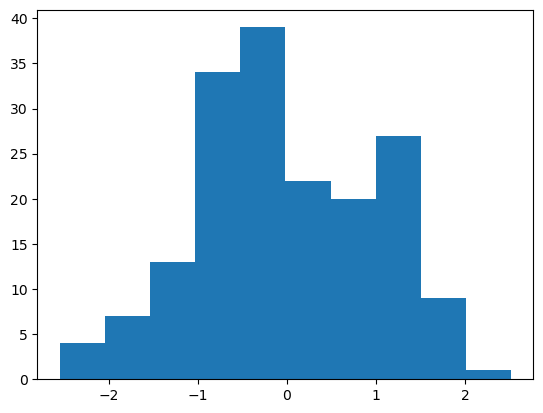

In [66]:
plt.hist(t[:,0])

In [67]:
power = PowerTransformer("box-cox")

In [68]:
t = power.fit_transform(df)

In [69]:
t

array([[ 1.39346140e+00,  5.10442399e-01,  1.38067122e+00,
         1.39105660e+00,  8.85068623e-01],
       [-8.37677678e-01,  3.27402109e-01, -5.97567204e-01,
        -9.22386959e-01,  2.69997328e+00],
       [-2.43204640e-01,  6.26686049e-01, -8.26543089e-02,
        -2.44701475e-01,  1.91604579e+00],
       [ 5.86077013e-01,  1.03782483e+00,  5.86176882e-01,
         6.00930881e-01, -9.19684555e-01],
       [-5.30284224e-03,  7.83288156e-01,  1.90539791e-01,
        -1.49936107e-02,  1.10065301e+00],
       [ 1.41468216e+00,  6.92722413e-01,  1.38067122e+00,
         1.47064870e+00,  1.43154664e-01],
       [-2.16123050e-01, -7.97506301e-01, -1.72494126e-01,
        -2.43860580e-01,  7.52623513e-01],
       [-1.75824295e+00, -1.78508278e+00, -1.79506091e+00,
        -1.77798773e+00,  4.20671758e-01],
       [ 8.88735298e-01, -6.13446160e-01,  9.93065696e-01,
         8.94315247e-01,  1.42720317e+00],
       [ 2.47934090e-01,  5.67896062e-01,  3.47362411e-01,
         2.12519026e-01

(array([ 4.,  7., 12., 34., 40., 22., 20., 28.,  8.,  1.]),
 array([-2.55704079, -2.04914826, -1.54125573, -1.0333632 , -0.52547066,
        -0.01757813,  0.4903144 ,  0.99820693,  1.50609946,  2.013992  ,
         2.52188453]),
 <BarContainer object of 10 artists>)

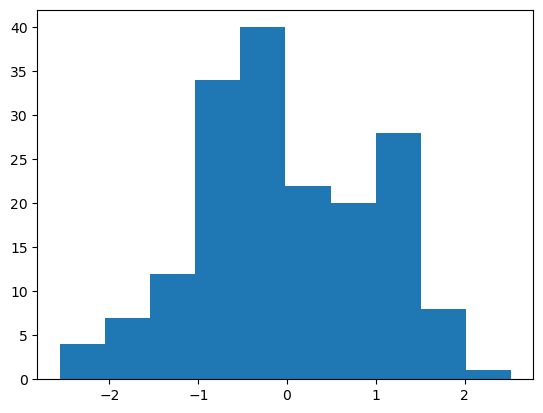

In [70]:
plt.hist(t[:,0])

In [71]:
from sklearn.preprocessing import KBinsDiscretizer

In [72]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


In [73]:
binner = KBinsDiscretizer(strategy = "uniform", n_bins = 5, encode = "ordinal")

In [74]:
binner.fit_transform(df)

array([[2., 1., 2., 2., 2.],
       [0., 1., 0., 0., 4.],
       [1., 2., 1., 0., 4.],
       [1., 2., 1., 1., 1.],
       [1., 2., 1., 0., 3.],
       [2., 2., 2., 2., 2.],
       [1., 1., 1., 0., 2.],
       [0., 0., 0., 0., 2.],
       [2., 1., 2., 1., 3.],
       [1., 1., 1., 0., 2.],
       [2., 2., 2., 1., 3.],
       [2., 2., 2., 2., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 0., 2.],
       [2., 2., 2., 1., 1.],
       [1., 1., 1., 0., 2.],
       [2., 1., 2., 1., 2.],
       [0., 1., 0., 0., 1.],
       [2., 1., 2., 1., 3.],
       [1., 1., 1., 0., 1.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 0.],
       [1., 2., 1., 0., 3.],
       [0., 1., 0., 0., 2.],
       [0., 0., 0., 0., 2.],
       [1., 1., 1., 0., 2.],
       [1., 0., 1., 0., 4.],
       [3., 2., 3., 2., 4.],
       [0., 1., 0., 0., 2.],
       [1., 0., 1., 0., 4.],
       [1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 3.],
       [2., 1., 2., 1., 2.],
       [2., 1., 2., 2., 1.],
       [1., 1.

In [75]:
from sklearn.preprocessing import Binarizer

In [76]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


In [77]:
converter = Binarizer(threshold = 12)

In [78]:
converter.fit_transform(df)

array([[1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 0., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 0.],
       [1., 1.

In [79]:
from sklearn.preprocessing import FunctionTransformer

In [80]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
8,13.00,21.82,87.50,519.8,0.12730
13,15.85,23.95,103.70,782.7,0.08401
14,13.73,22.61,93.60,578.3,0.11310
...,...,...,...,...,...
549,10.82,24.21,68.89,361.6,0.08192
550,10.86,21.48,68.51,360.5,0.07431
560,14.05,27.15,91.38,600.4,0.09929
564,21.56,22.39,142.00,1479.0,0.11100


In [81]:
trans = FunctionTransformer(np.log)

In [82]:
trans.fit_transform(df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
2,2.980111,3.056357,4.867534,7.092574,-2.210918
3,2.435366,3.014554,4.351310,5.956096,-1.948413
8,2.564949,3.082827,4.471639,6.253444,-2.061209
13,2.763170,3.175968,4.641502,6.662749,-2.476819
14,2.619583,3.118392,4.539030,6.360093,-2.179483
...,...,...,...,...,...
549,2.381396,3.186766,4.232511,5.890539,-2.502012
550,2.385086,3.067122,4.226980,5.887492,-2.599510
560,2.642622,3.301377,4.515027,6.397596,-2.309710
564,3.070840,3.108614,4.955827,7.299121,-2.198225


In [83]:
trans = FunctionTransformer(lambda x: x-1, validate = True)

In [84]:
trans.fit_transform(df)

array([[ 1.8690e+01,  2.0250e+01,  1.2900e+02,  1.2020e+03, -8.9040e-01],
       [ 1.0420e+01,  1.9380e+01,  7.6580e+01,  3.8510e+02, -8.5750e-01],
       [ 1.2000e+01,  2.0820e+01,  8.6500e+01,  5.1880e+02, -8.7270e-01],
       [ 1.4850e+01,  2.2950e+01,  1.0270e+02,  7.8170e+02, -9.1599e-01],
       [ 1.2730e+01,  2.1610e+01,  9.2600e+01,  5.7730e+02, -8.8690e-01],
       [ 1.8810e+01,  2.1150e+01,  1.2900e+02,  1.2590e+03, -9.0169e-01],
       [ 1.2080e+01,  1.4710e+01,  8.4630e+01,  5.1900e+02, -8.9250e-01],
       [ 8.5040e+00,  1.1440e+01,  5.9340e+01,  2.7290e+02, -8.9760e-01],
       [ 1.6140e+01,  1.5400e+01,  1.1500e+02,  9.1170e+02, -8.8140e-01],
       [ 1.3580e+01,  2.0530e+01,  9.6410e+01,  6.4380e+02, -8.9460e-01],
       [ 1.6020e+01,  2.2980e+01,  1.1180e+02,  8.9830e+02, -8.8030e-01],
       [ 1.8270e+01,  2.5470e+01,  1.2690e+02,  1.1610e+03, -9.0599e-01],
       [ 1.2030e+01,  1.7420e+01,  8.1610e+01,  5.2280e+02, -9.1017e-01],
       [ 1.2480e+01,  1.9820e+01,  8.7

In [85]:
df = df.iloc[:,0:2]

In [86]:
df = df.dropna()

In [87]:
m = df["mean radius"].mean()

In [88]:
transformer = ColumnTransformer([
    ("mean", Binarizer(threshold = m), ["mean radius"]),
    ("mean_text", KBinsDiscretizer(strategy="uniform", n_bins=10), ["mean_text"])
])

In [89]:
X = [[1], [2], [np.nan], [3]]

In [90]:
cleaner = SimpleImputer()

In [91]:
power = PowerTransformer()

In [92]:
X_clean = SimpleImputer().fit_transform(X)

In [93]:
X_final = PowerTransformer().fit_transform(X_clean)

In [94]:
X_final

array([[-1.43683574],
       [ 0.02299616],
       [ 0.02299616],
       [ 1.39084342]])

In [95]:
from sklearn.pipeline import make_pipeline, Pipeline

In [96]:
pipeline = make_pipeline(SimpleImputer(), PowerTransformer())

In [97]:
pipeline.fit_transform(X)

array([[-1.43683574],
       [ 0.02299616],
       [ 0.02299616],
       [ 1.39084342]])

In [98]:
pipeline = Pipeline([
    ("cleaning", SimpleImputer()),
    ("power", PowerTransformer())
])